# Reading source data

First we need to import the necessary python libraries. For importing the CSV files I chose pandas. For plotting the requested plots in the project I chose multiple plotting libraries. This for the reason that I already get to know them better. In general I chose the libraries pandas, numpy, seaborn, pyplot (matplotlib), patches (matplotlib) and plotting (pandas).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table
import matplotlib.patches as mpatches

For exporting the data I used the following SQL queries:

SELECT * FROM city_data WHERE city = 'Bern'

SELECT * FROM city_list

SELECT * FROM global_data

After importing the libraries we want to import the CSV source data files. Note: the backslashes need to be escaped.

In [3]:
city_data = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project1\\city_data.csv")
city_list = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project1\\city_list.csv")
global_data = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project1\\global_data.csv")

Let's take a quick look at the data files that we know what we are talking about. First I will analyze the city_data.csv file and visualize the first five rows.

In [4]:
city_data.head(5)

,year,city,country,avg_temp
0,1743,Bern,Switzerland,3.54
1,1744,Bern,Switzerland,8.19
2,1745,Bern,Switzerland,0.36
3,1746,Bern,Switzerland,NaN
4,1747,Bern,Switzerland,NaN


So the file is containing historic temperature average information for the closest city. To further analyze the data I create pandas data frames.

In [5]:
df_city_data = pd.DataFrame(data=city_data)
df_global_data = pd.DataFrame(data=global_data)

The function describe() gives me an overview over the numeric fields contained in the data frames. I will execute this function for both data sets relevant for the first question of the project (city_data, global_data).

In [6]:
df_city_data.describe()

,year,avg_temp
count,271.000000,267.000000
mean,1878.000000,6.808577
std,78.375166,0.861983
min,1743.000000,0.360000
25%,1810.500000,6.390000
50%,1878.000000,6.830000
75%,1945.500000,7.315000
max,2013.000000,8.780000


In [7]:
df_global_data.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


These descriptions tell me already that the global average temperature was significantly higher than the average temperature in Bern (8.37 compared to 6.81). I can use this information to validate the line plot that I have to create later on.

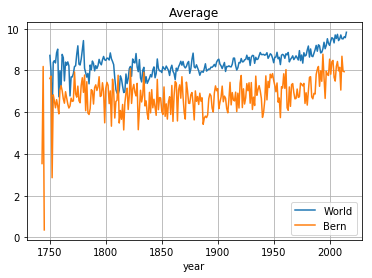

In [8]:
ax = df_global_data.plot(grid=0.5,title='Average',
                         x='year',y='avg_temp')
df_city_data.plot(grid=0.5,title='Average',x='year',
                  y='avg_temp',ax=ax).legend(["World", "Bern"]);

Visualizing just the average temperatures in a line chart shows that the data set for bern contains data even from way before 1750.

# Moving average

For the lineplot I need to add an additional column to both of the data frame. In this column I will store the calculated rolling mean for each row. The "2" in the rolling function set the size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size.

In [9]:
df_global_data['rolling_mean_2'] = global_data['avg_temp'].rolling(2).mean()
df_city_data['rolling_mean_2'] = city_data['avg_temp'].rolling(2).mean()

Now I am ready to set up the lineplot with the newly created column as the y-axis values and the year column as the x-axis values. For better visualization I additionally enable a grid and rename the labels for each data frame to ("World" and "Bern"). Finally I am setting a title for the line plot ("Rolling Average Temperature Bern vs. World").

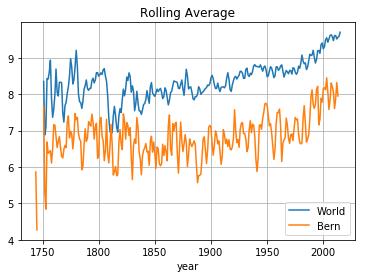

In [10]:
ax = df_global_data.plot(grid=0.5,title='Rolling Average',
                         x='year',y='rolling_mean_2')
df_city_data.plot(grid=0.5,title='Rolling Average',x='year',
                  y='rolling_mean_2',ax=ax).legend(["World", "Bern"]);

1. Observation: The plot seems to be correct compared to the output of the describe() function in the early stages of this project. It seems that the temperatures of Bern suffer more and higher up and downs than the global temperature. We can now play with the window size (e.g. 10 or 100) to see if there are any differences.

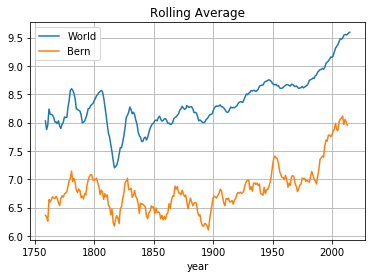

In [11]:
df_global_data['rolling_mean_10'] = global_data['avg_temp'].rolling(10).mean()
df_city_data['rolling_mean_10'] = city_data['avg_temp'].rolling(10).mean()
ax = df_global_data.plot(grid=0.5,title='Rolling Average',x='year',
                         y='rolling_mean_10')
df_city_data.plot(grid=0.5,title='Rolling Average',x='year',
                  y='rolling_mean_10',ax=ax).legend(["World", "Bern"]);

2. Observation: The graph with window 10 shows that in the last 50 years it was a very consistent increase of the average temperature for both world and bern. Before that timeframe the temperature was very consistent for both datasets with just many up and downs.

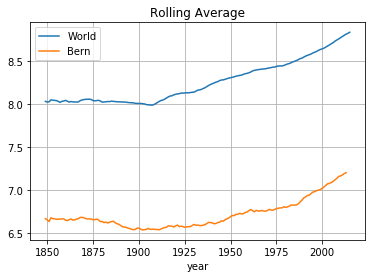

In [12]:
df_global_data['rolling_mean_100'] = global_data['avg_temp'].rolling(100).mean()
df_city_data['rolling_mean_100'] = city_data['avg_temp'].rolling(100).mean()
ax = df_global_data.plot(grid=0.5,title='Rolling Average',
                         x='year',y='rolling_mean_100')
df_city_data.plot(grid=0.5,title='Rolling Average',x='year',
                  y='rolling_mean_100',ax=ax).legend(["World", "Bern"]);

3. Observation: The moving average line chart with windows size 100 shows that the temperature for both datasets was even falling between 1875 and 1900. Somehow the trend then skips to ascending for any of the following years.

# Linear Regression

Text(0.5,1,'Linear Regression')

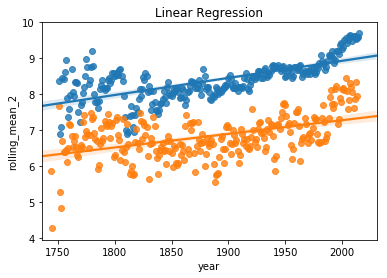

In [13]:
sns.regplot(x='year',y='rolling_mean_2',data=df_global_data)
sns.regplot(x='year',y='rolling_mean_2',
            data=df_city_data).set_title('Linear Regression')

4. Observation: The linear regression for the complete dataset shows that the global rolling average temperature has a higher slope than the rolling average temperature of Bern, Switzerland. This means that in general the global temperature increases fast then the local temperature in Bern.

# Boxplot

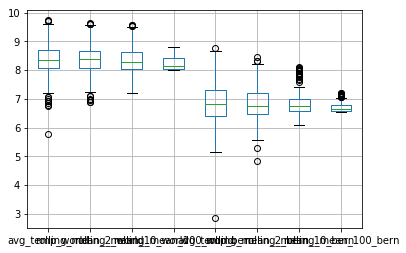

In [14]:
merged_inner = pd.merge(left=df_global_data,right=df_city_data, 
                        left_on='year', right_on='year')
merged_inner.shape
merged_inner
merged_inner = merged_inner.drop(['city', 'country'], axis=1)
merged_inner.columns = ['year','avg_temp_world','rolling_mean_2_world',
                        'rolling_mean_10_world','rolling_mean_100_world',
                        'avg_temp_bern','rolling_mean_2_bern',
                        'rolling_mean_10_bern','rolling_mean_100_bern']
merged_inner.boxplot(column=['avg_temp_world','rolling_mean_2_world',
                             'rolling_mean_10_world','rolling_mean_100_world',
                             'avg_temp_bern','rolling_mean_2_bern',
                             'rolling_mean_10_bern','rolling_mean_100_bern'])

5. Observation: Boxplotting the average temperature shows the significantly higher average and rolling average temperatures for the world compared to Bern.